# Amazon Copurchased

This is a Python notebook created using "jupyter".

Author: Rafael J. P. dos Santos

In [1]:
import time
started_at = time.time()
print started_at

1549329447.79


## Condições do experimento

* Quantidade limitada de arestas
* Todas as features
* Quantidade variável de n_estimators

## Parameters

We use the parameter below to set the maximum number of edges to be read from the CSV containing edges (links).

In [2]:
max_edges = 160000 # Set quantity to read from file
edges_csv_file = "data/20180812_links"
nodes_csv_file = "data/20180812_nodes"
n_estimators = 20
features = 'all'

In [3]:
# Parameters
n_estimators = 20
max_edges = 20000
features = "all"


## Load the libraries

Let's load the Python libraries that we will need throughout the script

In [4]:
%load_ext autoreload
%autoreload 1
%aimport shared_functions
import pandas as pd
import numpy as np
from __future__ import division
import shared_functions
from IPython.display import display, HTML

## Read graph

### Read only first lines of datafile

Due to slowness in calculating centrality measures, we use the parameter provided in the beggining of the script to limit the number of edges we will read.

In [5]:
G = shared_functions.read_G(edges_csv_file, max_edges)

Using 20000 edges out of 229338 available (8.72% of data)


### Calculate nodes centrality measures

Now that we have our NetworkX graph, let's calculate some centrality measures for every node.

In [6]:
centrality_measures = shared_functions.centrality_measures(G)
print centrality_measures.keys()

['eigenvector_centrality', 'degree', 'betweenness_centrality']


### Load node properties

Let's load the CSV containing the nodes data (title, price) into a Pandas dataframe, and append the centrality measures calculated above.

In [7]:
df = pd.read_csv(nodes_csv_file)

####  Convert ID to random int to avoid leaking knowledge

In [8]:
df = shared_functions.add_sha256_column_from_id(df)

#### Add centrality measures

In [9]:
df = shared_functions.merge_columns(df, centrality_measures)

### Let's convert some fields to numeric

In [10]:
if features == 'all':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'degree',
        'eigenvector_centrality',
        'betweenness_centrality',
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]
    
elif features == 'all_except_network_metrics':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]

elif features == 'none':
    
    categorical_features = []

    numeric_features = []

df = shared_functions.prepare_data(df, numeric_features)

### Remove nodes without price

In [11]:
df = df.drop(df[df["price"].isnull()].index)

### Inspect columns

In [12]:
df.columns

Index([u'id', u'title', u'url', u'authors', u'coverType', u'publisher',
       u'edition', u'publicationDate', u'rankingCategory', u'category1',
       u'category2', u'category3', u'category4', u'category5', u'category6',
       u'category7', u'category8', u'category9', u'category10', u'isbn10',
       u'isbn13', u'language', u'postProcessed', u'price', u'ranking',
       u'pages', u'reviewCount', u'rating', u'width', u'height', u'depth',
       u'weight', u'sha256_id', u'eigenvector_centrality', u'degree',
       u'betweenness_centrality'],
      dtype='object')

### Features summary

Below we have a summary of the Pandas dataframe. We can see the number of nodes that we are actually analyzing, which depends on the max_edges parameter defined before.

In [13]:
pd.set_option('display.max_columns', None)
df.describe(include='all', percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
count,4102.000000,4102,4102,4102,4057,4061,0.0,401,3844,3797,3797,2852,1425,568,125,9,0.0,0.0,0.0,4063,4063,4061,4102.0,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4.102000e+03,4.102000e+03,4102.000000,4102.000000
unique,NaN,4020,4102,2948,9,427,NaN,334,1,1,28,174,301,165,48,5,NaN,NaN,NaN,4063,4063,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Macroeconomia,https://www.amazon.com.br/dp/8535931015/,Vários Autores (Autor),Capa comum,Companhia das Letras,NaN,5 de fevereiro de 2014,Livros,Livros,Literatura e Ficção,Filosofia,Matemática,Faculdade,Probabilidade e Estatística,Abstrata,NaN,NaN,NaN,8525431494,978-8521318378,Português,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,1,39,3305,355,NaN,5,3844,3797,591,325,138,41,14,3,NaN,NaN,NaN,1,1,3386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2860.202340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,90.115580,35716.256500,378.541697,16.646056,4.450203,15.334128,22.322795,2.217189,442.921269,2.101962e+09,3.745309e-03,8.495368,0.002040
std,2114.015301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,190.122651,56611.803539,261.572101,37.048344,0.530242,2.482813,2.501593,1.289773,202.962448,1.228866e+09,1.488494e-02,22.295140,0.006451
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.990000,3.000000,4.000000,1.000000,1.000000,2.600000,8.600000,0.200000,9.100000,2.291770e+05,5.860282e-08,1.000000,0.000000
25%,1195.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,27.990000,5789.250000,216.000000,3.000000,4.400000,13.800000,20.800000,1.400000,299.000000,1.028654e+09,7.887278e-06,1.000000,0.000000
50%,2617.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,39.930000,18060.500000,320.000000,10.000000,4.453925,15.400000,22.800000,2.000000,444.980143,2.078429e+09,3.873898e-05,2.000000,0.000296
75%,3958.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,66.867500,37204.750000,464.000000,16.618748,4.800000,16.000000,23.400000,2.800000,544.000000,3.142654e+09,2.491863e-04,6.000000,0.001373


Below we can inspect the first rows of data, containing title, price, degree and other centrality measures.

In [14]:
df.head(10)

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
0,1,The Stanford Mathematics Problem Book: With Hi...,https://www.amazon.com.br/dp/0486469247/,"George Polya (Autor),",Capa comum,Dover Publications,NaN,19 de fevereiro de 2009,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Estudo e Ensino,NaN,NaN,NaN,NaN,NaN,0486469247,978-0486469249,Inglês,1,26.25,59183.0,68.0,1.000000,4.000000,14.0,21.0,0.6,181.0,3564330554,0.012592,19,0.007210
1,2,Fourier Series,https://www.amazon.com.br/dp/0486633179/,"Georgi P. Tolstov (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1976,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486633179,978-0486633176,Inglês,1,50.37,56112.0,352.0,3.000000,4.600000,14.6,21.0,1.9,363.0,1309098117,0.053493,62,0.004636
2,3,Probability Theory: A Concise Course,https://www.amazon.com.br/dp/0486635449/,"Y. A. Rozanov (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486635449,978-0486635446,Inglês,1,29.23,44345.0,160.0,16.618748,4.453925,14.4,20.8,0.8,200.0,1260550007,0.034533,59,0.010209
3,4,"Vectors, Tensors and the Basic Equations of Fl...",https://www.amazon.com.br/dp/0486661105/,"Rutherford Aris (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Engenharia e Transporte,Engenharia,Mecânica,Hidráulica,NaN,NaN,NaN,NaN,0486661105,978-0486661100,Inglês,1,48.79,82275.0,320.0,2.000000,4.500000,13.7,21.5,1.6,381.0,4012708477,0.011867,18,0.004635
4,5,Ordinary Differential Equations,https://www.amazon.com.br/dp/0486649407/,"Morris Tenenbaum (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486649407,978-0486649405,Inglês,1,71.63,40840.0,848.0,4.000000,4.500000,13.8,21.8,4.0,939.0,3891707921,0.074789,88,0.015724
5,6,The Variational Principles of Mechanics,https://www.amazon.com.br/dp/0486650677/,"Cornelius Lanczos (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486650677,978-0486650678,Inglês,1,88.15,36960.0,418.0,1.000000,5.000000,13.8,21.5,2.2,581.0,2030201243,0.050002,43,0.010259
6,7,A First Look at Perturbation Theory,https://www.amazon.com.br/dp/0486675513/,James G. Simmonds (Autor),Capa comum,Dover Publications Inc.,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486675513,978-0486675510,Inglês,1,36.10,37291.0,160.0,16.618748,4.453925,13.7,21.5,0.8,159.0,744636978,0.008733,9,0.000506
7,8,Thermodynamics and the Kinetic Theory of Gases...,https://www.amazon.com.br/dp/0486414612/,"Wolfgang Pauli (Autor),",Capa comum,Dover Publications,NaN,18 de outubro de 2010,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Dinâmica,Termodinâmica,NaN,NaN,NaN,NaN,0486414612,978-0486414614,Inglês,1,26.01,24406.0,160.0,2.000000,5.000000,13.8,21.6,1.0,159.0,425205287,0.004539,10,0.008395
8,9,Mechanics,https://www.amazon.com.br/dp/0486607542/,"Jacob P. Den Hartog (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1961,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486607542,978-0486607542,Inglês,1,50.96,90609.0,480.0,16.618748,4.453925,13.6,20.3,2.3,522.0,1246026773,0.019511,23,0.001692
9,10,Statistical Thermodynamics,https://www.amazon.com.br/dp/0486661016/,"Erwin Schrodinger (Autor),",Capa comum,Dover Publications,NaN,NaN,Liv

## Random forest using various features, price as target

### Preparing data

In [15]:
target, features, feature_list, test_features, test_target = shared_functions.prepare_datasets(df, numeric_features, categorical_features, 'price')

Numeric features:  ['degree', 'eigenvector_centrality', 'betweenness_centrality', 'ranking', 'reviewCount', 'pages', 'weight', 'height', 'width', 'depth', 'rating']
Categorical features:  ['category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10', 'language', 'coverType', 'publisher', 'rankingCategory', 'authors']
Target column:  price


Test percentage:  0.199902486592
Train features shape:  (3282, 4113)
Train target shape:  (3282,)
Test features shape:  (820, 4113)
Test target shape:  (820,)


### Average price and median price as baselines

It's important to have a baseline, so we can validate our predictions after running our model. One easy choice for baseline is the average price of a book.

We have an average price around R\$43, so this means that a very easy prediction would be to always guess R$43 for the price of any book.

In [16]:
average_target = np.average(target)
median_target = np.median(target)
print "Average price: R$", average_target
print "Median parice; R$", median_target

Average price: R$ 89.59398537477149
Median parice; R$ 39.94


### Cross val

#### Run cross val

In [17]:
estimators, splits, scores = shared_functions.run_cross_validation_regression(features, target, n_estimators)

#### Cross val score

In [18]:
shared_functions.print_score_summary(scores)

=== Relative
RF relative abs mean:  0.36153575768992363
RF relative abs std:  0.025676510575602156
Baseline (average) relative mean:  1.653205113814855
Baseline (average) relative std:  0.082355852899395
Baseline (median) relative mean:  0.5440731471587135
Baseline (median) relative std:  0.03113918284146392
=== Absolute
RF abs mean:  33.28344352296315
RF abs std:  5.3879069462185845
Baseline (average) mean:  83.8846234655552
Baseline (average) std:  5.961643276679727
Baseline (median) mean:  62.24032050189042
Baseline (median) std:  6.335987053012926


####  List of most important features

In [19]:
shared_functions.get_most_important_features(estimators, feature_list)

,feature,mean importance,std,std/mean
0,eigenvector_centrality,30.746305,1.734849,0.056425
1,pages,12.166470,1.268177,0.104235
2,coverType_Capa comum,6.560855,2.186850,0.333318
3,betweenness_centrality,6.104490,0.714308,0.117014
4,coverType_Capa dura,4.808973,3.264951,0.678929
5,width,4.780895,0.944944,0.197650
6,publisher_McGraw-Hill Science/Engineering/Math,4.740092,2.082630,0.439365
7,publisher_Cengage Learning,4.112138,1.965955,0.478086
8,height,2.600861,0.625525,0.240507
9,sha256_id,1.748018,0.259360,0.148374


### Predicted price vs real price

Splits quantity:  10
Splits lenghts:  [329, 329, 328, 328, 328, 328, 328, 328, 328, 328]
X shape:  (3282, 4113)
y shape:  (3282,)


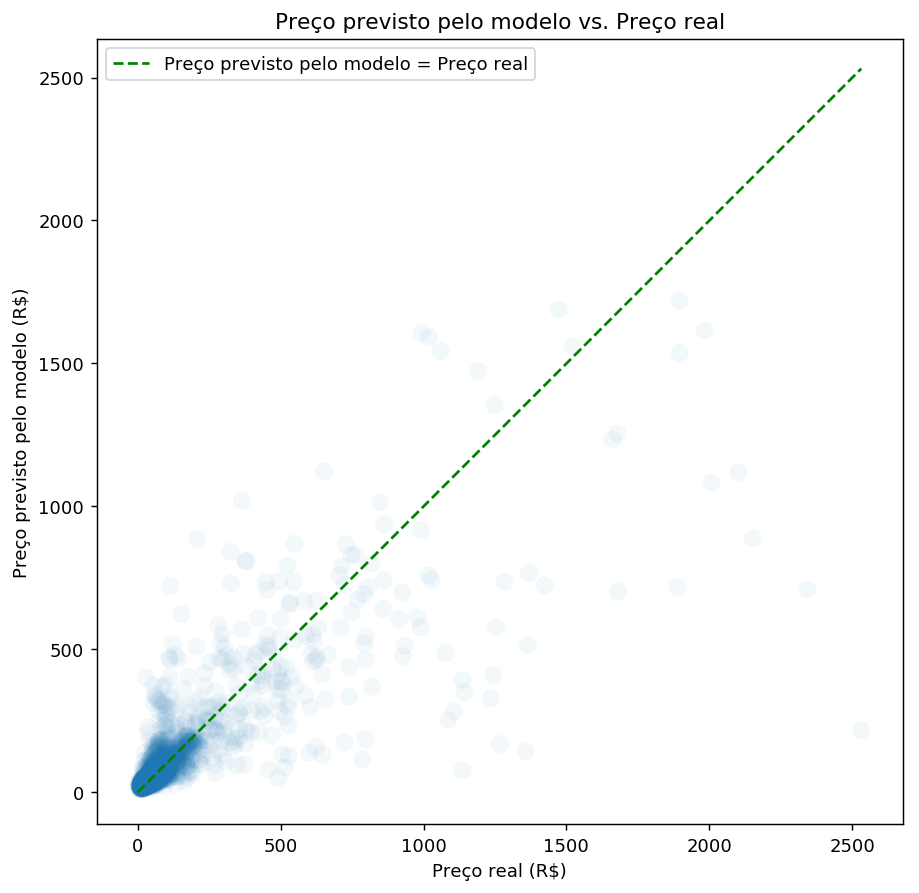

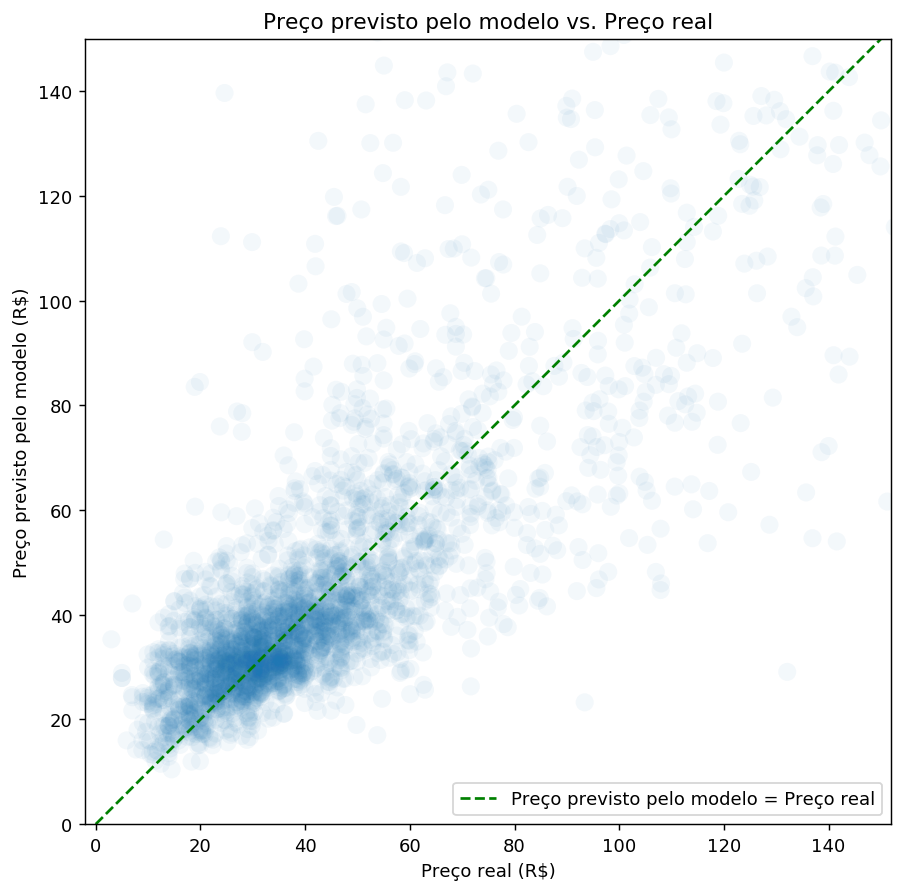

In [20]:
y_pred = shared_functions.get_all_predictions_from_splits(features, target, splits, estimators)                                                  
shared_functions.plot_splits_predicted_vs_real(target, y_pred, title=u'Preço previsto pelo modelo vs. Preço real', xlabel=u'Preço real (R$)', ylabel=u'Preço previsto pelo modelo (R$)', legend=u'Preço previsto pelo modelo = Preço real', zoomY = 150)

### Mean absolute error

Now we can compare the errors obtained by our predictions against the errors provided by the baseline (average price). Our prediction errors should be less than the baseline errors to consider the model successful.

In [21]:
errors, errors_baseline, errors_relative, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative = shared_functions.print_mean_absolute_error(y_pred, target, average_target, median_target)

== Absolute
('Mean absolute prediction error: R$', 33.28)
('Std prediction error: R$', 105.2)
('Mean absolute error using average: R$', 83.88)
('Std prediction error using average: R$', 170.29)
('Mean absolute error using median: R$', 62.24)
('Std prediction error using median: R$', 186.09)
== Relative
('Mean relative absolute prediction error: ', 0.36)
('Std relative prediction error: ', 0.57)
('Mean relative absolute error using average: ', 1.65)
('Std relative prediction error using average: ', 1.64)
('Mean absolute error using median: R$', 0.54)
('Std prediction error using median: R$', 0.6)


### Join data

In [22]:
pd.set_option('display.max_columns', None)
predicted_df, joined_predicted_df = shared_functions.join_predicted_df(df, features, target, y_pred, errors, errors_relative, errors_baseline, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative)

### Worst absolute predictions

Below we can inspect the rows with the biggest prediction error.

In [23]:
joined_predicted_df.sort_values('error', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.565469e+08,"[456546893.0, 13.0, 0.0210727178754, 0.0012177...",2314.1160,2441.476015,2491.13,0.984220,0.964602,0.914284,216.9540,2531.07,1685,Complex Analysis Complex Analysis Complex Anal...,https://www.amazon.com.br/dp/0070006571/,"Lars V. Ahlfors (Autor),",Capa dura,McGraw-Hill Science/Engineering/Math,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0070006571,978-0070006577,Inglês,1,2531.07,36626.500628,345.000000,16.618748,4.453925,16.000000,23.100000,2.500000,444.980143,0.021073,13,0.001218
1.731114e+09,"[1731113829.0, 13.0, 0.025706204142, 0.0007988...",1631.7780,2251.606015,2301.26,0.982940,0.961732,0.696984,709.4220,2341.20,1779,Modern Physics for Scientists and Engineers,https://www.amazon.com.br/dp/1133103723/,"Stephen T. Thornton (Autor),",Capa dura,Cengage Learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1133103723,978-1133103721,Inglês,1,2341.20,36626.500628,688.000000,16.618748,4.453925,20.300000,25.400000,3.200000,444.980143,0.025706,13,0.000799
7.945218e+08,"[794521798.0, 2.0, 0.00134049119642, 6.2039069...",1263.4565,2062.576015,2112.23,0.981442,0.958370,0.587062,888.7135,2152.17,2199,Introduction to Chemical Engineering Thermodyn...,https://www.amazon.com.br/dp/1259696529/,J.M. Smith Termodinamica en ingenieria quimica...,Capa dura,McGraw-Hill Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1259696529,978-1259696527,Inglês,1,2152.17,36626.500628,768.000000,16.618748,4.453925,18.500000,23.900000,3.300000,444.980143,0.001340,2,0.000062
1.993779e+09,"[1993779221.0, 25.0, 0.0320806832688, 0.001541...",1213.0665,1267.406015,1317.06,0.970567,0.933976,0.893933,143.9335,1357.00,1716,A VULVA 2 Ed 2003,https://www.amazon.com.br/dp/8126532289/,S. M. Neill C. M. Ridley (Autor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8126532289,978-8126532285,Inglês,1,1357.00,36626.500628,383.778694,16.618748,4.453925,15.397945,22.381195,2.237916,444.980143,0.032081,25,0.001541
9.158984e+07,"[91589843.0, 13.0, 0.0217120590348, 0.00062453...",1171.6510,1799.166015,1848.82,0.978854,0.952565,0.620328,717.1090,1888.76,1712,Vector Calculus,https://www.amazon.com.br/dp/1429215089/,"Jerrold E. Marsden (Autor),",Capa dura,W.H. Freeman & Company,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Análise Vetorial,NaN,NaN,NaN,NaN,1429215089,978-1429215084,Inglês,1,1888.76,311760.000000,545.000000,16.618748,4.453925,21.000000,26.000000,3.200000,444.980143,0.021712,13,0.000625
2.611927e+09,"[2611927292.0, 1.0, 0.00083333710589, 0.0, 366...",1097.8330,1176.766015,1226.42,0.968461,0.929251,0.866920,168.5270,1266.36,1937,The Physics of Low-dimensional Semiconductors:...,https://www.amazon.com.br/dp/0521481481/,Dr John H. Davies (Autor),Capa dura,Cambridge University Press,NaN,13 de dezembro de 1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0521481481,978-0521481489,Inglês,1,1266.36,36626.500628,458.000000,16.618748,4.453925,17.700000,25.300000,2.500000,444.980143,0.000833,1,0.000000
1.088718e+09,"[1088718135.0, 32.0, 0.0359736675015, 0.001946...",1059.1980,1046.686015,1096.34,0.964850,0.921151,0.932163,77.0820,1136.28,1830,Geometric Algebra,https://www.amazon.com.br/dp/0471608394/,E. Artin (Autor),Capa comum,Wiley-Blackwell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0471608394,978-0471608394,Inglês,1,1136.28,36626.500628,224.000000,16.618748,4.453925,14.700000,22.900000,1.200000,308.000000,0.035974,32,0.001946
1.144179e+09,"[1144

### Worst relative predictions

In [24]:
joined_predicted_df.sort_values('error_relative', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.429830e+09,"[2429829614.0, 7.0, 0.013781490956, 0.00058146...",370.7620,59.733985,10.08,0.337575,2.000468,12.416678,400.6220,29.86,2170,How to Memorize Formulas in Mathematics: Book-...,https://www.amazon.com.br/dp/1973255464/,Rajesh Sarswat (Autor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,29.86,36626.500628,383.778694,16.618748,4.453925,15.397945,22.381195,2.237916,444.980143,0.013781,7,0.000581
2.272729e+08,"[227272911.0, 1.0, 1.52513874795e-05, 0.0, 145...",32.3175,86.603985,36.95,12.357860,28.964544,10.808528,35.3075,2.99,5170,Caçadores de Obras-Primas,https://www.amazon.com.br/dp/8532526144/,Robert M. Edsel (Autor),Capa comum,Rocco,NaN,NaN,Livros,Livros,História,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8532526144,978-8532526144,Português,1,2.99,1451.000000,368.000000,9.000000,4.200000,15.800000,22.800000,2.000000,558.000000,0.000015,1,0.000000
3.298496e+09,"[3298495980.0, 1.0, 0.00250298590856, 0.0, 366...",315.2840,32.053985,17.60,0.305874,0.557073,5.479388,372.8240,57.54,2082,"GRE Prep 2018: Test Prep Book, Study Guide, & ...",https://www.amazon.com.br/dp/1628455004/,GRE Study Guide Book 2018 Exam Team (Autor),Capa comum,Test Prep Books,NaN,13 de fevereiro de 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1628455004,978-1628455007,Inglês,1,57.54,36626.500628,114.000000,16.618748,4.453925,21.600000,27.900000,0.700000,499.000000,0.002503,1,0.000000
1.641909e+09,"[1641909461.0, 1.0, 0.00158560771024, 0.0, 366...",609.9875,23.356015,73.01,0.646392,0.206782,5.400509,722.9375,112.95,1764,The Ashtray: (Or the Man Who Denied Reality),https://www.amazon.com.br/dp/0226922685/,Errol Morris (Autor),Capa dura,University of Chicago Press,NaN,16 de maio de 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0226922685,978-0226922683,Inglês,1,112.95,36626.500628,192.000000,16.618748,4.453925,20.300000,25.400000,2.000000,444.980143,0.001586,1,0.000000
1.509883e+09,"[1509882571.0, 1.0, 0.0017573539151, 0.0, 8352...",189.9060,52.183985,2.53,0.067629,1.394921,5.076343,227.3160,37.41,1818,Quantum Computing for Babies,https://www.amazon.com.br/dp/1492671185/,"Chris Ferrie (Autor),",Livro cartonado,Sourcebooks Jabberwocky,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Infantil e Infantojuvenil,Ciência e Natureza,Física,NaN,NaN,NaN,NaN,NaN,1492671185,978-1492671183,Inglês,1,37.41,83523.000000,24.000000,16.618748,4.453925,19.800000,20.300000,1.300000,354.000000,0.001757,1,0.000000
2.016695e+09,"[2016695322.0, 1.0, 3.95430814371e-06, 0.0, 15...",35.1640,82.603985,32.95,4.713877,11.817451,5.030615,42.1540,6.99,3304,Saúde Total,https://www.amazon.com.br/dp/8546900914/,"William Davis (Autor),",Capa comum,WMF Martins Fontes,NaN,NaN,Livros,Livros,Saúde e Família,Dietas e Emagrecimento,Dietas,NaN,NaN,NaN,NaN,NaN,NaN,8546900914,978-8546900916,Português,1,6.99,1557.000000,512.000000,19.000000,4.500000,13.800000,20.800000,3.400000,358.000000,0.000004,1,0.000000
2.839318e+08,"[283931800.0, 1.0, 2.12010957039e-05, 0.0, 146...",23.8920,84.593985,34.94,6.988000,16.918797,4.778400,28.8920,5.00,4791,Um Certo Capitão Rodrigo,https://www.amazon.com.br/dp/8535905987/,Erico Verissimo (Autor),Capa comum,Companhia das Letras,NaN,NaN,Livros,Livros,Literatura e Ficção,Poesia,Europeia,NaN,NaN,NaN,NaN,NaN,NaN,8535905987,978-8535905984,Português,1,5.00,14644.000000,192.000000,8.000000,4.800000,13.400000,18.400000,1.600000,222.000000,0.000021,1,0.000000
3.111671e+09,"[3111671101.0, 2.0, 0.00117908556795, 0.000112...",283.8

### Best absolute predictions

In [25]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.895352e+08,"[489535195.0, 4.0, 3.93885957327e-05, 0.001146...",0.0040,40.693985,8.96,0.183231,0.832188,0.000082,48.8960,48.90,2961,A Grande Fome de Mao,https://www.amazon.com.br/dp/8501401617/,"Frank Dikötter (Autor),",Capa comum,Record,NaN,NaN,Livros,Livros,História,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8501401617,978-8501401618,Português,1,48.90,15082.000000,532.0,6.000000,4.400000,15.2,22.4,3.4,621.0,0.000039,4,0.001147
1.553629e+09,"[1553629008.0, 2.0, 2.56572125079e-05, 0.00046...",0.0055,47.273985,2.38,0.056238,1.117060,0.000130,42.3145,42.32,2835,O Animal Social,https://www.amazon.com.br/dp/8539005638/,David Brooks (Autor),Capa comum,Objetiva,NaN,NaN,Livros,Livros,"Política, Filosofia e Ciências Sociais",Ciências Sociais,Antropologia,NaN,NaN,NaN,NaN,NaN,NaN,8539005638,978-8539005635,Português,1,42.32,6360.000000,496.0,7.000000,5.000000,16.0,23.0,2.8,762.0,0.000026,2,0.000468
4.101435e+09,"[4101435170.0, 1.0, 2.3014953301e-06, 0.0, 848...",0.0060,61.563985,11.91,0.424902,2.196361,0.000214,28.0240,28.03,4131,Liquidação,https://www.amazon.com.br/dp/8535907580/,Imre Kertész (Autor),Capa comum,Companhia das Letras,NaN,NaN,Livros,Livros,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8535907580,978-8535907582,Português,1,28.03,8489.000000,112.0,2.000000,4.000000,13.6,20.8,1.0,200.0,0.000002,1,0.000000
1.008870e+09,"[1008870466.0, 1.0, 1.58806709243e-06, 0.0, 44...",0.0135,69.043985,19.39,0.943552,3.359805,0.000657,20.5365,20.55,6007,A Arte de Se Comunicar,https://www.amazon.com.br/dp/8532653553/,Thich Nhat Hanh (Autor),Capa comum,Vozes,NaN,NaN,Livros,Livros,"Educação, Referência e Didáticos",Escolas e Ensino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8532653553,978-8532653550,Português,1,20.55,4470.000000,128.0,1.000000,5.000000,13.0,20.8,0.8,159.0,0.000002,1,0.000000
3.823542e+09,"[3823541935.0, 1.0, 0.000143419374899, 0.0, 36...",0.0215,44.903985,4.75,0.106288,1.004788,0.000481,44.6685,44.69,1466,Veterinary Science: A Very Short Introduction,https://www.amazon.com.br/dp/0198790961/,James Yeates (Autor),Capa comum,OUP Oxford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0198790961,978-0198790969,Inglês,1,44.69,36626.500628,160.0,16.618748,4.453925,11.2,17.0,1.3,141.0,0.000143,1,0.000000
1.000965e+09,"[1000964615.0, 1.0, 1.59164141444e-05, 0.0, 16...",0.0220,56.693985,7.04,0.213982,1.723221,0.000669,32.8780,32.90,2919,Hit Makers,https://www.amazon.com.br/dp/8595081301/,Derek Thompson (Autor),Capa comum,HarperCollins,NaN,NaN,Livros,Livros,"Administração, Negócios e Economia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8595081301,978-8595081307,Português,1,32.90,1666.000000,368.0,2.000000,4.500000,15.4,22.8,1.8,558.0,0.000016,1,0.000000
3.220922e+09,"[3220922297.0, 3.0, 2.39901032427e-05, 0.00060...",0.0300,61.993985,12.34,0.447101,2.246159,0.001087,27.6300,27.60,2804,História de Roma,https://www.amazon.com.br/dp/8539300893/,Pierre Grimal (Autor),Capa comum,UNESP,NaN,NaN,Livros,Livros,História,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8539300893,978-8539300891,Português,1,27.60,14637.000000,160.0,6.000000,4.500000,11.0,20.8,1.2,200.0,0.000024,3,0.000605
2.360530e+05,"[236053.0, 2.0, 1.9205335261e-05, 0.0005601166...",0.0300,62.893985,13.24,0.495880,2.355580,0.001124,26.6700,26.70,3538,Um Ano Depois,https://www.amazon.com.br/dp/8593828604/,"Anne Wiazemsky (Autor),",Capa comum,Todavia,NaN,NaN,Livros,Livros,Biografias e Histórias Reais,Arte e Literatura,"Artistas, Arquitetos e Fotógrafos",NaN,NaN,NaN,NaN,NaN,NaN,8593828604,978-8593828607,Português

### Best relative predictions

In [26]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.895352e+08,"[489535195.0, 4.0, 3.93885957327e-05, 0.001146...",0.0040,40.693985,8.96,0.183231,0.832188,0.000082,48.8960,48.90,2961,A Grande Fome de Mao,https://www.amazon.com.br/dp/8501401617/,"Frank Dikötter (Autor),",Capa comum,Record,NaN,NaN,Livros,Livros,História,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8501401617,978-8501401618,Português,1,48.90,15082.000000,532.0,6.000000,4.400000,15.2,22.4,3.4,621.0,0.000039,4,0.001147
1.553629e+09,"[1553629008.0, 2.0, 2.56572125079e-05, 0.00046...",0.0055,47.273985,2.38,0.056238,1.117060,0.000130,42.3145,42.32,2835,O Animal Social,https://www.amazon.com.br/dp/8539005638/,David Brooks (Autor),Capa comum,Objetiva,NaN,NaN,Livros,Livros,"Política, Filosofia e Ciências Sociais",Ciências Sociais,Antropologia,NaN,NaN,NaN,NaN,NaN,NaN,8539005638,978-8539005635,Português,1,42.32,6360.000000,496.0,7.000000,5.000000,16.0,23.0,2.8,762.0,0.000026,2,0.000468
4.101435e+09,"[4101435170.0, 1.0, 2.3014953301e-06, 0.0, 848...",0.0060,61.563985,11.91,0.424902,2.196361,0.000214,28.0240,28.03,4131,Liquidação,https://www.amazon.com.br/dp/8535907580/,Imre Kertész (Autor),Capa comum,Companhia das Letras,NaN,NaN,Livros,Livros,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8535907580,978-8535907582,Português,1,28.03,8489.000000,112.0,2.000000,4.000000,13.6,20.8,1.0,200.0,0.000002,1,0.000000
1.008870e+09,"[1008870466.0, 1.0, 1.58806709243e-06, 0.0, 44...",0.0135,69.043985,19.39,0.943552,3.359805,0.000657,20.5365,20.55,6007,A Arte de Se Comunicar,https://www.amazon.com.br/dp/8532653553/,Thich Nhat Hanh (Autor),Capa comum,Vozes,NaN,NaN,Livros,Livros,"Educação, Referência e Didáticos",Escolas e Ensino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8532653553,978-8532653550,Português,1,20.55,4470.000000,128.0,1.000000,5.000000,13.0,20.8,0.8,159.0,0.000002,1,0.000000
3.823542e+09,"[3823541935.0, 1.0, 0.000143419374899, 0.0, 36...",0.0215,44.903985,4.75,0.106288,1.004788,0.000481,44.6685,44.69,1466,Veterinary Science: A Very Short Introduction,https://www.amazon.com.br/dp/0198790961/,James Yeates (Autor),Capa comum,OUP Oxford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0198790961,978-0198790969,Inglês,1,44.69,36626.500628,160.0,16.618748,4.453925,11.2,17.0,1.3,141.0,0.000143,1,0.000000
1.000965e+09,"[1000964615.0, 1.0, 1.59164141444e-05, 0.0, 16...",0.0220,56.693985,7.04,0.213982,1.723221,0.000669,32.8780,32.90,2919,Hit Makers,https://www.amazon.com.br/dp/8595081301/,Derek Thompson (Autor),Capa comum,HarperCollins,NaN,NaN,Livros,Livros,"Administração, Negócios e Economia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8595081301,978-8595081307,Português,1,32.90,1666.000000,368.0,2.000000,4.500000,15.4,22.8,1.8,558.0,0.000016,1,0.000000
3.220922e+09,"[3220922297.0, 3.0, 2.39901032427e-05, 0.00060...",0.0300,61.993985,12.34,0.447101,2.246159,0.001087,27.6300,27.60,2804,História de Roma,https://www.amazon.com.br/dp/8539300893/,Pierre Grimal (Autor),Capa comum,UNESP,NaN,NaN,Livros,Livros,História,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8539300893,978-8539300891,Português,1,27.60,14637.000000,160.0,6.000000,4.500000,11.0,20.8,1.2,200.0,0.000024,3,0.000605
2.360530e+05,"[236053.0, 2.0, 1.9205335261e-05, 0.0005601166...",0.0300,62.893985,13.24,0.495880,2.355580,0.001124,26.6700,26.70,3538,Um Ano Depois,https://www.amazon.com.br/dp/8593828604/,"Anne Wiazemsky (Autor),",Capa comum,Todavia,NaN,NaN,Livros,Livros,Biografias e Histórias Reais,Arte e Literatura,"Artistas, Arquitetos e Fotógrafos",NaN,NaN,NaN,NaN,NaN,NaN,8593828604,978-8593828607,Português

### Relative errors distribution

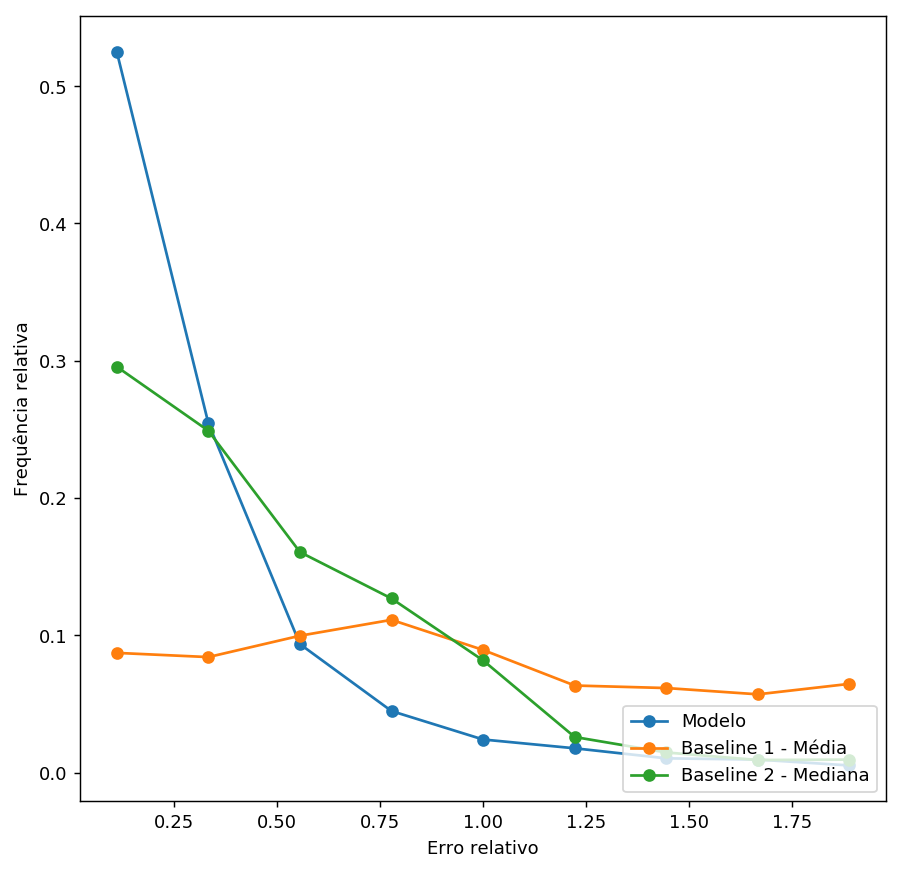

In [27]:
centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median = shared_functions.plot_relative_error_distribution(predicted_df)

#### Accumulated

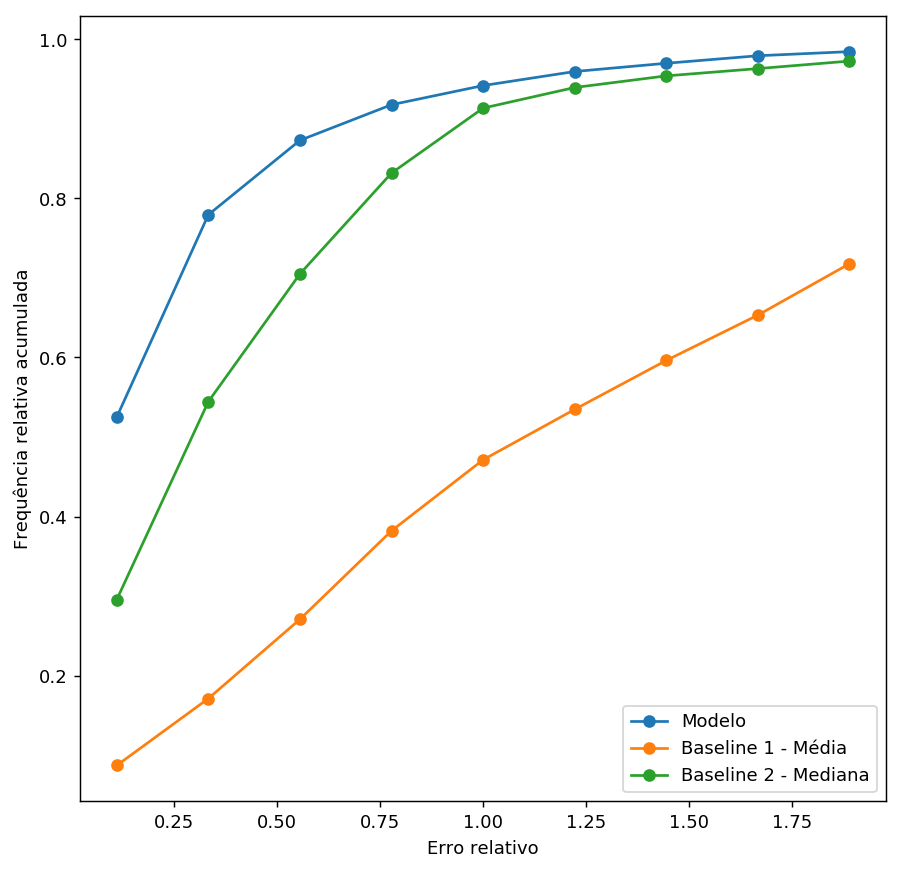

In [28]:
shared_functions.plot_accumulated_relative_error(centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median)

### Joined data summary

In [29]:
joined_predicted_df.describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,edition,category8,category9,category10,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,0.0,0.0,0.0,0.0,3282.0,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3.282000e+03,3282.000000,3282.000000
mean,33.281887,83.880964,62.237179,0.544070,1.653185,0.361547,84.445911,89.593985,2866.762035,NaN,NaN,NaN,NaN,1.0,89.593985,35054.715763,375.393098,16.704667,4.452547,15.338911,22.328987,2.205041,445.083225,3.844955e-03,8.202316,0.001951
std,105.212394,170.320639,186.115296,0.596002,1.636883,0.571747,148.883684,189.861214,2103.206407,NaN,NaN,NaN,NaN,0.0,189.861214,55025.229400,261.442179,37.475438,0.525345,2.459498,2.485035,1.270947,204.147278,1.507048e-02,20.591539,0.005929
min,0.004000,0.083985,0.020000,0.000501,0.000938,0.000082,10.460500,2.990000,2.000000,NaN,NaN,NaN,NaN,1.0,2.990000,3.000000,4.000000,1.000000,1.000000,2.800000,10.000000,0.200000,9.100000,5.860282e-08,1.000000,0.000000
25%,4.003375,39.693985,7.315000,0.183356,0.623335,0.100871,30.770500,28.100000,1214.250000,NaN,NaN,NaN,NaN,1.0,28.100000,5913.000000,216.000000,3.000000,4.400000,13.800000,20.800000,1.400000,299.000000,7.841563e-06,1.000000,0.000000
50%,8.826250,54.693985,15.050000,0.401346,1.243215,0.209406,39.676250,39.940000,2630.500000,NaN,NaN,NaN,NaN,1.0,39.940000,18201.000000,320.000000,10.000000,4.453925,15.400000,22.800000,2.000000,444.980143,3.878966e-05,2.000000,0.000309
75%,19.772375,66.491485,28.592500,0.737277,2.188398,0.403016,65.638625,64.997500,3961.750000,NaN,NaN,NaN,NaN,1.0,64.997500,37006.750000,460.750000,16.618748,4.800000,16.000000,23.400000,2.700000,558.000000,2.545428e-04,6.000000,0.001378
85%,33.909050,72.710985,64.045000,0.911005,2.897085,0.592027,112.686150,103.985000,4440.700000,NaN,NaN,NaN,NaN,1.0,103.985000,57095.200000,576.000000,16.618748,5.000000,17.000000,24.000000,3.200000,680.000000,7.428994e-04,12.000000,0.002504
90%,60.516750,79.150188,113.980000,0.997999,3.481940,0.775462,163.143900,153.920000,5630.900000,NaN,NaN,NaN,NaN,1.0,153.920000,76358.100000,656.000000,24.900000,5.000000,18.690000,24.900000,3.600000,739.000000,4.442507e-03,18.000000,0.004106
95%,136.815075,246.443515,296.097500,1.497811,4.603126,1.181057,314.226650,336.037500,7493.250000,NaN,NaN,NaN,NaN,1.0,336.037500,122784.000000,821.700000,54.000000,5.000000,20.800000,27.600000,4.400000,862.000000,2.806675e-02,34.000000,0.008998


# Finished

In [30]:
finished_at = time.time()
duration = finished_at - started_at
print "Duração em segundos:"
print duration

Duração em segundos:
109.206484079


<img src="files/image.png">